<a href="https://colab.research.google.com/github/DevJaepaL/OpenCV/blob/main/%EB%AA%A8%ED%8F%B4%EB%A6%AC%EC%A7%80_%EA%B8%B0%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **모폴리지 연산자**



*   이진 영상과 구주 요소를 입려바고 연산집합을 이용하여 둘을 결합하는 방법
*   이진 영상에서의 모폴리지 연산은 전경(foreground)의 형태적 처리에 이용되지만 그레이 영상에서는 잡음의 제거나 영상의 밝기를 변화시키는데 사용 된다.
*  모폴리지 연산자는 크게 기본 연산자와 정교 연산자로 나뉘어진다.

*  **노이즈 제거, 구멍 채우기,끊어진 선 붙이기 등에 사용되는 형태학적 연산의 의미한다.**



---





**기본 연산자(basic operator)**


*   구조 요소의 값이 전경(1로 표시되는 영역)과 고려안함(아무것도 표시되지 않는 영역)으로 이루어진다.

**정교 연산자(sophisticated operator)**


*   전경과 고려안함 뿐만 아니라 배경(background) 또한 포함되어 이루어진다.

**구조 요소**



*   특정 구조를 지닌 마스크 형태로써 각 화소는 1과 고려안함 OR 0으로 이루어진다.


---










# **팽창 연산(Dilation)**



*   수학적 모폴리지에 쓰이는 대표적인 기본 연산중 하나에 해당한다.
*   전경 영역을 테두리의 외곽 방향으로 **확장 시킨다.**
<br>
<br>
다음 코드는 팽창 연산에 대한 코드이다.

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


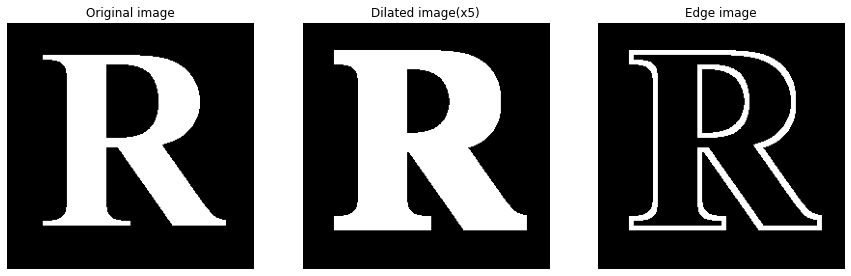

In [7]:
from google.colab import drive
drive.mount('/content/gdrive')
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import cv2

# 영상 불러오기
img = cv2.imread('/content/gdrive/My Drive/Image_Processing/char.bmp')
kernel = np.ones((3,3),np.uint8)
dilation = cv2.dilate(img,kernel,iterations = 5) 
# img는 dilate 함수를 수행할 연산, kernel은 dilate를 수행하기 위한 커널 크기,
# iterations는 반복할 횟수를 뜻함.

# 영상 출력
plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.title("Original image")
plt.imshow(img)
plt.axis("off")
plt.subplot(1,3,2)
plt.title("Dilated image(x5)") # 팽창 연산 5회
plt.axis("off")
plt.imshow(dilation)
plt.subplot(1,3,3)
plt.title("Edge image") # a(원본) - b(팽창 연산) 결과 이미지
plt.axis("off")
plt.imshow(dilation-img)
#cv2.imwrite('/content/gdrive/MyDrive/Colab Notebooks/book_image/dilation3.bmp', dilation)

보이는 바와 같이, 팽창 연산을 실행한 경우 요소의 크기가 커짐을 알 수있다.

다음 코드는 회색 영상을 팽창 연산한 결과이다.

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
[[0 1 0]
 [1 1 1]
 [0 1 0]]
Original image


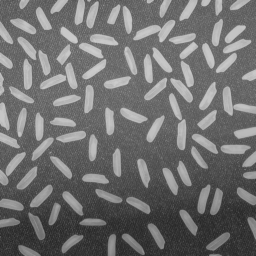

Gray dialtion 1


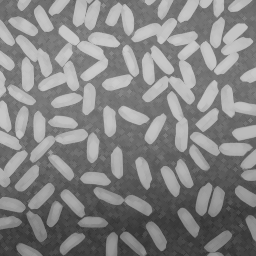

Gray dialtion 2(x3)


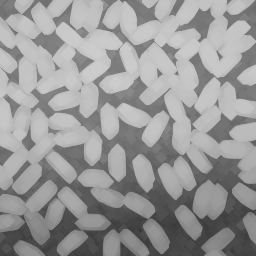

In [19]:
from google.colab import drive
drive.mount('/content/gdrive')
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import cv2

# 영상 처리
img = cv2.imread('/content/gdrive/My Drive/Image_Processing/rice.bmp',0)
#kernel = np.ones((3,3),np.uint8)
#kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
dilation = cv2.dilate(img,kernel,iterations = 2)
dilation2 = cv2.dilate(dilation,kernel,iterations = 3)

print(kernel)
# 영상 출력
print("Original image")
cv2_imshow(img)
print("Gray dialtion 1")
cv2_imshow(dilation)
print("Gray dialtion 2(x3)")
cv2_imshow(dilation2)

# **침식 연산(Erosion)**


*   팽창 연산과 더불어 수학적 모폴리지에 쓰이는 두 가지 기본 연산 중 하나에 해당한다.
*   전경 영역을 테두리에서부터 **내부 방향으로 침식** 시키는 역할을 한다.
* 팽창 연산과 대비되는 연산이다.
* **배경잡음 제거에는 유용하나, 객채의 잡음을 확대시키는 단점이 있다.**

[ 1, **1** ,1 ]<br>
[ **0**, **1**, **1** ]<br>
[ 1, **1**, 1 ]<br>
이와 같이 근처 값이 하나라도 0일 경우, 중앙 값을 1로 설정한다.


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


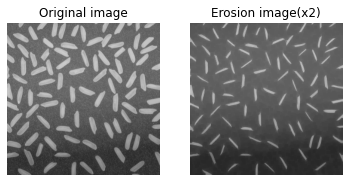

In [38]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount ('/content/gdrive')
##################
img = cv2.imread('/content/gdrive/My Drive/Image_Processing/rice.bmp')
kernel = np.ones((3,3),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 2)
##################
plt.subplot(1,2,1)
plt.title("Original image")
plt.imshow(img)
plt.axis("off")
plt.subplot(1,2,2)
plt.title("Erosion image(x2)") # 침식 연산 2회
plt.axis("off")
plt.imshow(erosion)

영상의 밝은 영역은 사라지고, 어두운 영역은 확장됨을 알 수있다.

---
# **열림 연산(Opening)**



*   침식 + 팽창 연산의 조합으로 표현된다.
*   침식 연산과 같이 전경 영역을 깎아내기 위하여 사용된다.
*   단순히 깎아내는 침식 연산과는 다르게 구조 요소와 <br>유사한 형태의 전경을 **선택적으로 보존하면서 나머지 부분을 깎아내는데 사용한다.**

---

다음 코드는 열림 연산의 대한 코드이다.


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


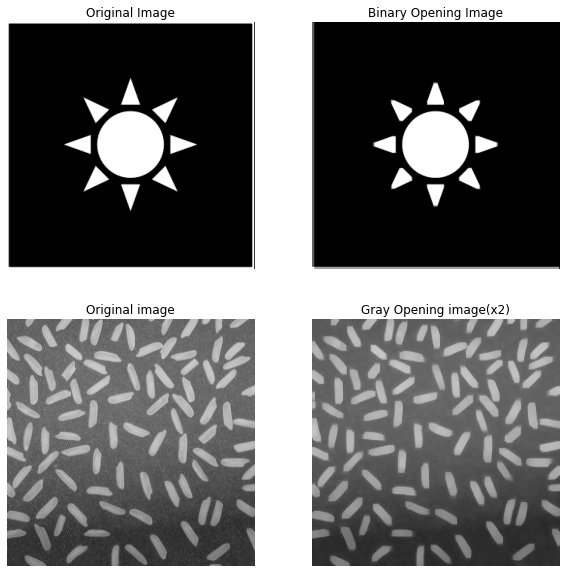

In [39]:
from google.colab import drive
drive.mount('/content/gdrive')
import numpy as np
from google.colab.patches import cv2_imshow
import cv2
##################
img1 = cv2.imread('/content/gdrive/My Drive/Image_Processing/Picture4.png')
img2 = cv2.imread('/content/gdrive/My Drive/Image_Processing/rice.bmp')
kernel = np.ones((5,5),np.uint8) # 5x5 구조 연산
opening1 = cv2.morphologyEx(img1, cv2.MORPH_OPEN, kernel)
opening2 = cv2.morphologyEx(img2, cv2.MORPH_OPEN, kernel)
##################
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.title("Original Image")
plt.imshow(img1)
plt.axis("off")
plt.subplot(2,2,2)
plt.title("Binary Opening Image")
plt.axis("off")
plt.imshow(opening1)
plt.subplot(2,2,3)
plt.title("Original image")
plt.imshow(img2)
plt.axis("off")
plt.subplot(2,2,4)
plt.title("Gray Opening image(x2)")
plt.axis("off")
plt.imshow(opening2)

구조요소보다 크기가 작은 밝은 특징들은 밝기가 감소되지만<br> 
상대적으로 크기가 큰
부분들의 밝은 특징들은 보존되거나 변화가 적다.

<hr>

# **닫힘 연산(Closing)**

*  열림 연산과 마찬가지로 수학적 모폴로지의 가장 중요한 연산자 중의 하나에 해당한다. 
*  영역의 외부에는 변화가 없지만 내부 영역은 구조 요소에 따라 채워진 결과를 가진다.

<hr>

다음 코드는 닫힘 연산에 대한 코드이다.

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


(-0.5, 2493.5, 2042.5, -0.5)

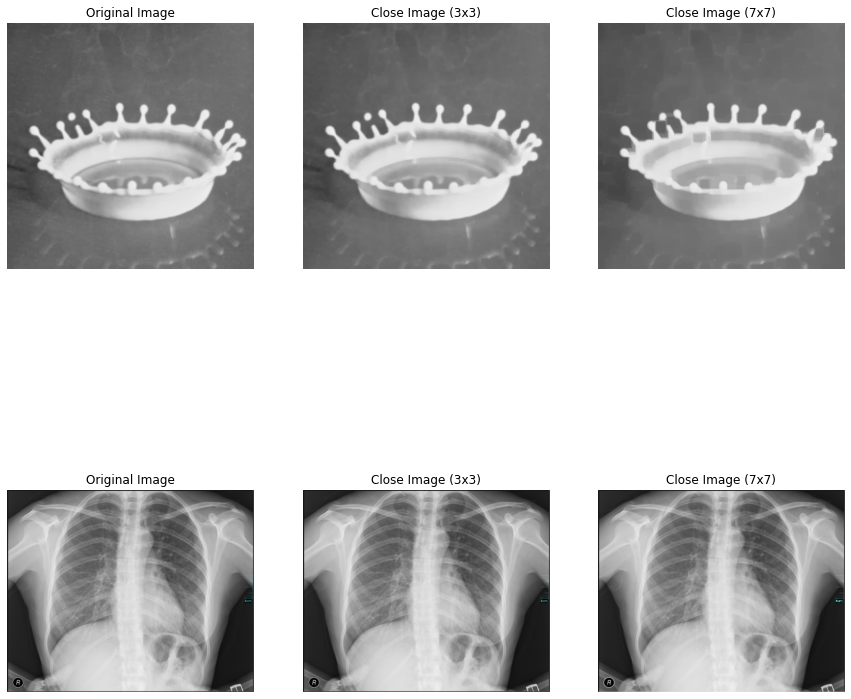

In [48]:
from google.colab import drive
drive.mount('/content/gdrive')

import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow
import cv2

##################################
img = cv2.imread('/content/gdrive/My Drive/Image_Processing/milkdrop.bmp')
kernel = np.ones((3,3),np.uint8)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
kernel1 = np.ones((7,7),np.uint8)
closing1 = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel1)

img2 = cv2.imread('/content/gdrive/My Drive/Image_Processing/xray.bmp')
closing2 = cv2.morphologyEx(img2, cv2.MORPH_CLOSE, kernel)
closing3 = cv2.morphologyEx(img2, cv2.MORPH_CLOSE, kernel1)
#######################
plt.figure(figsize=(15,15))
plt.subplot(2,3,1)
plt.title("Original Image")
plt.imshow(img)
plt.axis("off")
plt.subplot(2,3,2)
plt.title("Close Image (3x3)")
plt.axis("off")
plt.imshow(closing)
plt.subplot(2,3,3)
plt.title("Close Image (7x7)")
plt.imshow(closing1)
plt.axis("off")
########################
plt.subplot(2,3,4)
plt.title("Original Image")
plt.imshow(img2)
plt.axis("off")
plt.subplot(2,3,5)
plt.title("Close Image (3x3)")
plt.axis("off")
plt.imshow(closing2)
plt.subplot(2,3,6)
plt.title("Close Image (7x7)")
plt.imshow(closing3)
plt.axis("off")